<h3><font color = 'green'>Author: Aman Agarwal, Daniel Siegel</font></h3>

<font color = 'black'>In this notebook, we provide some examples on how to access data from the hdf5 files provided in this repository. These files contain output data from the collapsar model presented in the accompanying paper https://arxiv.org/abs/2111.03094, each file representing a different stellar progenitor. We also demonstrate how to reproduce some of the main figures of the paper.</font>



In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker


def contour_plots(rb_array,
                  fk_array,
                  z_array,
                  final_BH_mass,
                  title,
                  figure_directory,
                  figname,
                  linew=1.5,
                  flag=0,
                  logscale=False,
                  clabel=False,
                  vmin=None,
                  vmax=None,
                  nooflvls=None,
                  samplearrayx=None,
                  samplearrayy=None,
                  extend='both'
                  ):
  
    figs=plt.figure(100)
    if flag==1:
        nooflevels=0
    elif nooflvls!=None:
        nooflevels=nooflvls
    else:
        nooflevels=20

    
    if logscale==True:
      c = plt.contourf(log10(rb_array),fk_array,z_array,locator=ticker.LogLocator(),extend=extend,cmap='viridis')#levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
    elif vmin!=None and vmax!=None:
      c = plt.contourf(log10(rb_array),fk_array,z_array,levels=np.arange(vmin,vmax,(vmax-vmin)/nooflevels),vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
    else:
      c = plt.contourf(log10(rb_array),fk_array,z_array,levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')

    if clabel==True:
      plt.clabel(c,inline=True, fontsize=7,fmt='%d')

    cmap = c.get_cmap()
    cmap.set_over('orange')
    c.set_cmap(cmap)
    
    plt.clim(vmin,vmax)
    cb=plt.colorbar(c,extend=extend)
    if (final_BH_mass.max())<71:
        print('Masses outside GW190521 regime')
    elif (final_BH_mass.min())>106:
        print('Masses outside GW190521 regime')
    else:
        levels=[71,85,106]
        CS=plt.contour(log10(rb_array),fk_array,final_BH_mass,levels=levels,colors=['red','red','red'],linewidths=linew)
        manual_locations=[(9.1,0.75),(9.35,0.75),(9.5,0.7)]
        plt.clabel(CS,levels, inline=True, fontsize=9, manual=manual_locations,fmt='%d')
        mass_gap_levels=[60,130]
        CS2=plt.contour(log10(rb_array),fk_array,final_BH_mass,levels=mass_gap_levels,colors=['aqua','aqua'],linewidths=linew)
        plt.clabel(CS2,mass_gap_levels,inline=True, fontsize=9,fmt='%d')
        
    if samplearrayx != None:
        for nx,x_sample in enumerate(samplearrayx):
            plt.plot(log10(x_sample),samplearrayy[nx],'x',color='red')
            
    plt.title(title)
    plt.ylabel('$f_{\mathrm{K}}$') 
    plt.xlabel('$\\log_{10} \\; r_{\\mathrm{b}} \\; [\\mathrm{cm}]$')
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    if not os.path.exists(figure_directory):
      os.makedirs(figure_directory)
    plt.savefig(figure_directory+figname)
    plt.show()
    plt.close()
    return


<font color = 'black'>
The simulations and results stored are governed chiefly by two parameters: break/shell radius ($r_b$) and fraction of max. Keplerian angular momentum ($f_k$). The collapsar model calculations vary these two parameteres and record final data values such as M_ejecta (total mass ejected at the end of the accretion process) and also time series data such as instantaneous disk mass (mass of the disk as a function of time throughout the simulation).

Each hdf5 file contains three types of data:</br>
1) The various $r_b$ and $f_k$ values for which the models were run </br>
</br>
2) 2D data such as M_ejecta, M_r_process_ejecta for the $f_k$-$r_b$ parameter space (generally has key value analogous to: LRP_mass_with_p_exp_4.5)</br>
</br>
3) 1D time series data such as instantneous ISCO radius and instantaneous wind angular momentum data for each point in the covered $f_k$-$r_b$ space (generally has key value analogous to: J_wind_with__p_exp =4.5_alpha=0.05_j_shell= 0.4j_kep_R_shell= 9.5e+08)</br>
</br>
The key values encode other relevant parameter settings of the model, such as the values of the power-law exponent $p$ ("p_exp"; Eq. (2) in the paper) and the disk viscosity $\alpha$ ("alpha"; Eq. (17) in the paper). Here, generally p_exp = 4.5 and alpha = 0.05.</br>
</font>

In [2]:
p_exp = 4.5
alpha = 0.05

In [3]:
import h5py

# replace below with the path of the directory+filename where you save the data
# keep unchanged if you are maintaining the directory structure from the zenodo repo
filename= "./Renzo_models_output_files/250.25_final_prof.hdf5" #"INSERT_YOUR_FILENAME_HERE"
model_name = "Renzo_250.25"
with h5py.File(filename, "r") as f:
    # List all groups
    a_group_key = list(f.keys())
    for key in a_group_key[:6]:
      print(key)

    

Accretion_timescales_with_p_exp_4.5
BBO_detection_horizon_with_p_exp_4.5
CE_detection_horizon_with_p_exp_4.5
DECIGO_detection_horizon_with_p_exp_4.5
Density
ET_detection_horizon_with_p_exp_4.5


Get the values of $r_b$ ("r_shell") and $f_k$ ("surf") in the $f_k$-$r_b$ parameter grid.

In [4]:
import numpy as np

rb_array=np.empty
fk_array=np.empty
with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])

print(rb_array)
print(fk_array)

[9.0e+08 9.5e+08 1.0e+09 1.5e+09 2.0e+09 2.5e+09 3.0e+09 3.5e+09 4.0e+09
 4.5e+09 5.0e+09 5.5e+09 6.0e+09 6.5e+09 7.0e+09]
[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]


# 2D contour plots

Get the 2D model data on the $f_k$-$r_b$ grid and generate 2D contour plots.

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from numpy import *
import numpy as np
import os
import h5py

# constants

from astropy import constants as const
import astropy.units as u

Msun = const.M_sun.cgs.value # in g
Grav = const.G.cgs.value # in cm^3/(g s^2)
v_c = const.c.cgs.value # in cm/s
Rsun=const.R_sun.to('cm') #in cm
Mpc_in_cgs=(((10**6)*u.parsec).cgs).value

<h4><font color = 'green'>Figures 4 and 5 of the paper</font></h4>

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


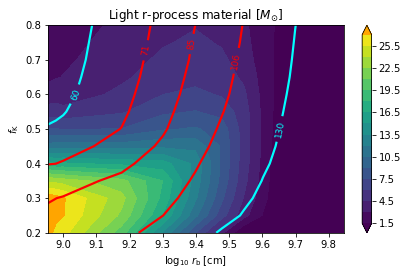

LRP_mass_with_p_exp_
./Renzo_models_output_files/250.25_final_prof.hdf5


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


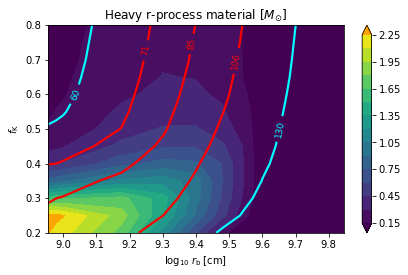

RP_mass_with_p_exp_
./Renzo_models_output_files/250.25_final_prof.hdf5


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


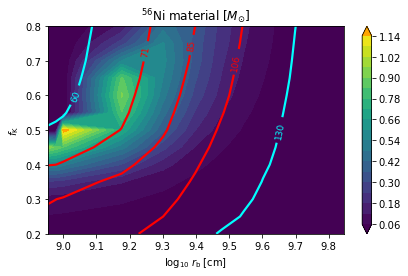

Ni_mass_with_p_exp_
./Renzo_models_output_files/250.25_final_prof.hdf5


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


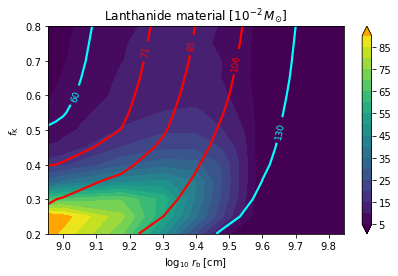

Lanthanide_mass_with_p_exp_
./Renzo_models_output_files/250.25_final_prof.hdf5


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


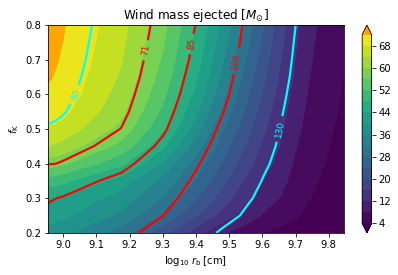

Final_wind_mass_with_p_exp_
./Renzo_models_output_files/250.25_final_prof.hdf5


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


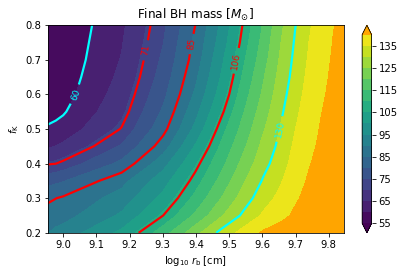

Final_BH_mass_with_p_exp_
./Renzo_models_output_files/250.25_final_prof.hdf5


In [6]:
contour_names=["LRP_mass_with_p_exp_","RP_mass_with_p_exp_","Ni_mass_with_p_exp_","Lanthanide_mass_with_p_exp_","Final_wind_mass_with_p_exp_","Final_BH_mass_with_p_exp_"]#,"Spiral_waves_existence_with_p_exp_"]
title_names=['Light r-process material [$M_{\odot}$]','Heavy r-process material [$M_{\odot}$]','$^{56}$Ni material [$M_{\odot}$]','Lanthanide material [$10^{-2}\, M_{\odot}$]','Wind mass ejected [$M_{\odot}$]','Final BH mass [$M_{\odot}$]']#,'Spiral waves']
save_names=['/contourplots/lrp/','/contourplots/rp/','/contourplots/Ni_mass/','/contourplots/lan_mass/','/contourplots/wind_mass/','/contourplots/final_BH/']#,'/contourplots/flag_sp']
logscale_array = []
z_array=np.empty
  
with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])     
  for nt,name in enumerate(contour_names):
    z_array=np.array(f[name+str(p_exp)])
    if name=="Lanthanide_mass_with_p_exp_" :
      z_array=z_array/1e-2

    final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
    contour_plots(rb_array, fk_array, z_array, final_BH_mass,title_names[nt], "./"+save_names[nt],model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf", linew=2.2,flag=0,logscale=False)
    
    print(name)
    print(filename)

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


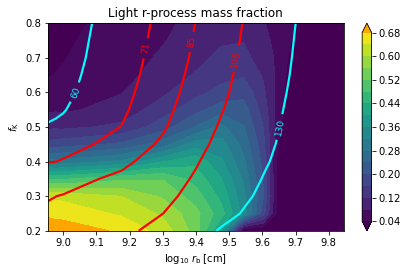

Mass fraction LRP_mass_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


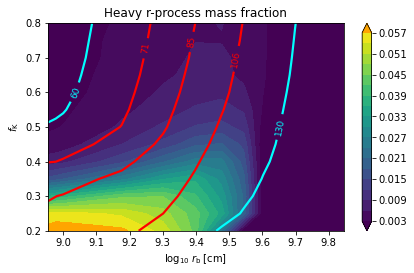

Mass fraction RP_mass_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


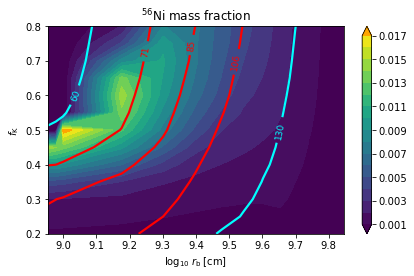

Mass fraction Ni_mass_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


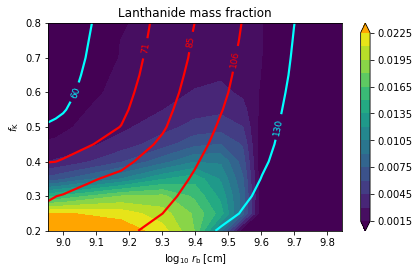

Mass fraction Lanthanide_mass_with_p_exp_


In [7]:
# contour plots for ejecta mass fractions

contour_names_frac=["LRP_mass_with_p_exp_","RP_mass_with_p_exp_","Ni_mass_with_p_exp_","Lanthanide_mass_with_p_exp_"]
title_names_frac=['Light r-process mass fraction','Heavy r-process mass fraction','$^{56}$Ni mass fraction','Lanthanide mass fraction']
save_names_frac=['/contourplots/lrp_frac/','/contourplots/rp_frac/','/contourplots/Ni_frac/','/contourplots/lan_frac/']
with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])     
  total_array=np.zeros_like(np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)]))
  for nt,name in enumerate(contour_names_frac):
    z_array=np.array(f[name+str(p_exp)])
    stellar_rotation_params={'p_exp':p_exp}
    final_wind_mass=np.array(f["Final_wind_mass_with_p_exp_"+str(p_exp)])
    final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
    total_array=total_array+(z_array/final_wind_mass)
    contour_plots(rb_array, fk_array, z_array/(final_wind_mass), final_BH_mass,title_names_frac[nt],"./"+save_names_frac[nt],model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf",linew=2.2,flag=0)
    print('Mass fraction',name) 

<h4><font color = 'green'>Figure 6 of the paper</font></h4>

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


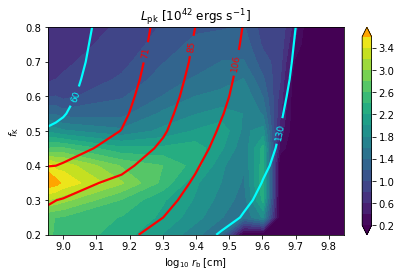

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


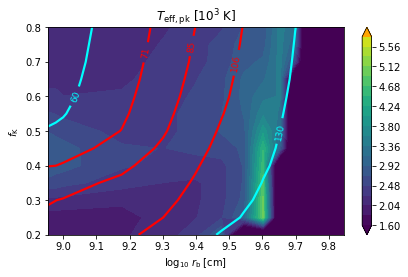

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


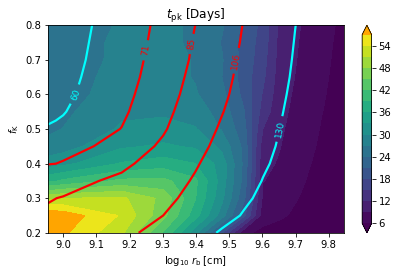

In [8]:
# kilonova contour plots

title_names=['$t_{\mathrm{pk}}$ [Days]','$L_{\mathrm{pk}}$ [$10^{42}$ ergs $\mathrm{s^{-1}}$]','$T_{\mathrm{eff,pk}}$ [$10^3$ K]']
save_names=['/contourplots/tpk/','/contourplots/lpk/','/contourplots/teffpk/','/contourplots/kappa/']

with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])
  stellar_rotation_params={'p_exp':p_exp}
  final_lan_mass=np.array(f["Lanthanide_mass_with_p_exp_"+str(p_exp)])
  final_wind_mass=np.array(f["Final_wind_mass_with_p_exp_"+str(p_exp)])
  final_r_process_mass=np.array(f["RP_mass_with_p_exp_"+str(p_exp)])+np.array(f["LRP_mass_with_p_exp_"+str(p_exp)])
  final_X_La=final_lan_mass/final_wind_mass
  final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
  
  interp_kappa_cgs= 0.03+ (final_X_La-1e-4)*((3-0.03)/(0.2-1e-4))#gm/cc
  interp_kappa_cgs[final_X_La<1e-4]=0.03
  interp_kappa_cgs[final_X_La>2e-1]=3
  
  t_pk_days=np.zeros_like(interp_kappa_cgs)
  L_pk_cgs=np.zeros_like(interp_kappa_cgs)
  L_pk_cgs_lin=np.zeros_like(interp_kappa_cgs)
  T_eff_pk_K=np.zeros_like(interp_kappa_cgs)
  t_pk_in_days=108*np.sqrt(final_wind_mass/50)*np.sqrt(interp_kappa_cgs)
  
  L_pk_cgs=(4*10**(41))*(final_r_process_mass/(0.2*final_wind_mass))*((final_wind_mass/50)**(0.35))*((interp_kappa_cgs)**(-0.65))
  
  T_eff_pk_K=900*((final_r_process_mass/(0.2*final_wind_mass))**(0.25))*((final_wind_mass/50)**(-0.16))*((interp_kappa_cgs)**(-0.41))

  contour_plots(rb_array, fk_array, L_pk_cgs/(1e42), final_BH_mass,title_names[1], "./" + save_names[1],model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf", linew=2.2,flag=0,nooflvls=20)
  contour_plots(rb_array, fk_array, T_eff_pk_K/(1e3), final_BH_mass,title_names[2], "./" + save_names[2], model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf",linew=2.2,flag=0,vmin=1.6,vmax=6)
  contour_plots(rb_array, fk_array, t_pk_in_days, final_BH_mass,title_names[0], "./" + save_names[0], model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf", linew=2.2,flag=0,nooflvls=20)
  

<h4><font color = 'green'>Figure 9 of the paper</font></h4>

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


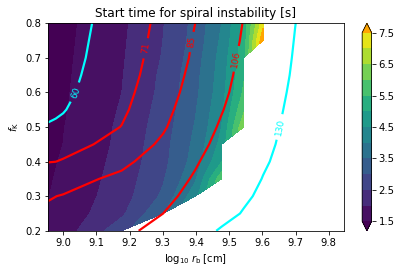

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  c = plt.contourf(log10(rb_array),fk_array,z_array,locator=ticker.LogLocator(),extend=extend,cmap='viridis')#levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor r

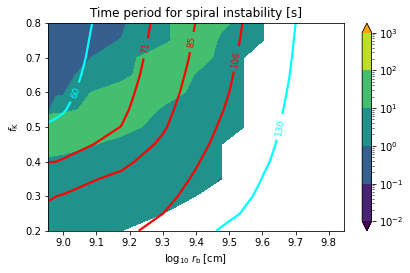

In [9]:
title_names=['Start time','Time period of instability']
save_names=['/contourplots/t_start/','/contourplots/dt/']
t_start_array=np.empty
dt_array=np.empty
  
with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])
  t_start_array=np.array(f["t_start_array_with_p_exp_"+str(p_exp)])
  dt_array = np.array(f["dt_array_with_p_exp_"+str(p_exp)])
  stellar_rotation_params={'p_exp':p_exp}
  final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
    
  contour_plots(rb_array, fk_array, t_start_array, final_BH_mass,'Start time for spiral instability [s]', './contourplots/t_start_spiral_wave/', model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf", linew=2.2,flag=0,logscale=False,nooflvls=15)
  contour_plots(rb_array, fk_array, dt_array, final_BH_mass,'Time period for spiral instability [s]', './contourplots/dt_spiral_wave_trunc/',model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf",linew=2.2,flag=0,logscale=True)
  

<h4><font color = 'green'>Figures 13 and 23 of the paper</font></h4>


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  c = plt.contourf(log10(rb_array),fk_array,z_array,locator=ticker.LogLocator(),extend=extend,cmap='viridis')#levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor r

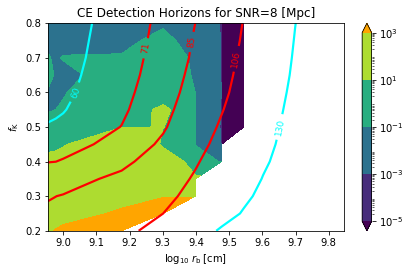

Detection Horizon CE_detection_horizon_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  c = plt.contourf(log10(rb_array),fk_array,z_array,locator=ticker.LogLocator(),extend=extend,cmap='viridis')#levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor r

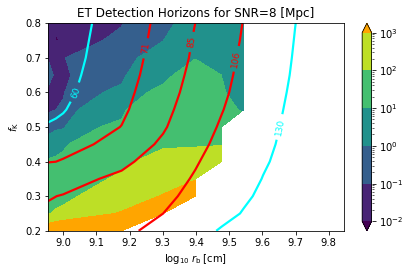

Detection Horizon ET_detection_horizon_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  c = plt.contourf(log10(rb_array),fk_array,z_array,locator=ticker.LogLocator(),extend=extend,cmap='viridis')#levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor r

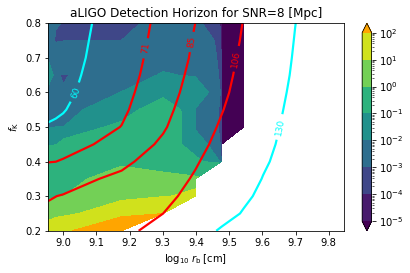

Detection Horizon aLIGO_detection_horizon_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  c = plt.contourf(log10(rb_array),fk_array,z_array,locator=ticker.LogLocator(),extend=extend,cmap='viridis')#levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor r

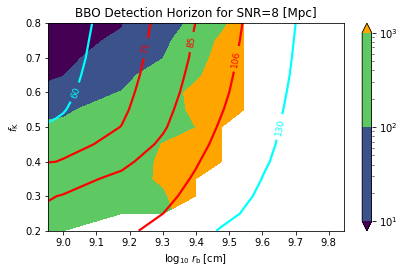

Detection Horizon BBO_detection_horizon_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:34: UserWarning: Log scale: values of z <= 0 have been masked
  c = plt.contourf(log10(rb_array),fk_array,z_array,locator=ticker.LogLocator(),extend=extend,cmap='viridis')#levels=nooflevels,vmin=vmin,vmax=vmax,extend=extend, cmap ='viridis')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor r

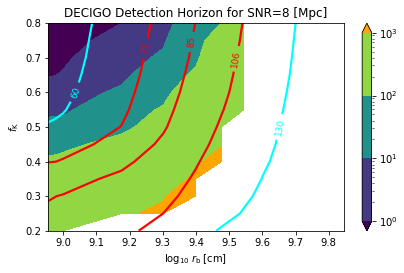

Detection Horizon DECIGO_detection_horizon_with_p_exp_


In [10]:
required_SNR = 8
contour_names_DH = ["CE_detection_horizon_with_p_exp_", "ET_detection_horizon_with_p_exp_",
                 "aLIGO_detection_horizon_with_p_exp_", "BBO_detection_horizon_with_p_exp_",
                 "DECIGO_detection_horizon_with_p_exp_"]
title_names_DH = ['CE Detection Horizons for SNR='+str(required_SNR) +' [Mpc]',
             'ET Detection Horizons for SNR='+str(required_SNR) +' [Mpc]',
             'aLIGO Detection Horizon for SNR='+str(required_SNR) +' [Mpc]',
             'BBO Detection Horizon for SNR='+str(required_SNR) +' [Mpc]',
             'DECIGO Detection Horizon for SNR='+str(required_SNR) +' [Mpc]']

save_names_DH = ['/contourplots/CE_dh/','/contourplots/ET_dh/',
            '/contourplots/aLIGO_dh/', '/contourplots/BBO_dh/',
            '/contourplots/DECIGO_dh/']
  
with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])
  for nt,name in enumerate(contour_names_DH):
    z_array=np.array(f[name+str(p_exp)])
    stellar_rotation_params={'p_exp':p_exp}
    final_wind_mass=np.array(f["Final_wind_mass_with_p_exp_"+str(p_exp)])
    final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
    
    contour_plots(rb_array, fk_array, z_array, final_BH_mass,title_names_DH[nt], "./"+ save_names_DH[nt], model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf",linew=2.2,logscale=True,extend='both')
    
    print('Detection Horizon',name)
  

<h4><font color = 'green'>Figures 21 and 22 of the paper</font></h4>


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


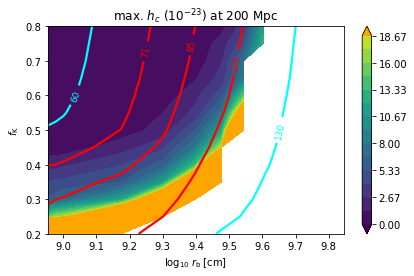

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


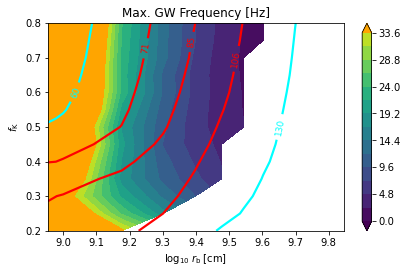

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


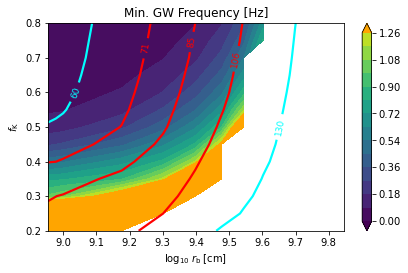

In [11]:
r_in_Mpc = 200

title_names=['Max. GW Frequency [Hz]','Min. GW Frequency [Hz]']
save_names=['/contourplots/gw_freq_hz_max/','/contourplots/gw_freq_hz_min/']
frequency_array=np.empty

with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])
  GW_strain_max_array = np.array(f["max_gw_strain_with_p_exp_"+str(p_exp)])
  frequency_array_max=zeros([size(fk_array),size(rb_array)])
  frequency_array_min=zeros([size(fk_array),size(rb_array)])
  flag_array=zeros([size(fk_array),size(rb_array)])
  M_BH_array=np.empty
  M_disk_array=np.empty
  instability_existence_array=np.empty
  Omega_disk=np.empty

  for rnum,rb in enumerate(rb_array):
    for snum,fk in enumerate(fk_array):
      pathname="_p_exp ="+str(p_exp)+"_alpha="+str(alpha)+"_j_shell= "+str(fk)+"j_kep"+r"_R_shell= "+"{:.1e}".format(rb)
      flag_array[snum,rnum]=np.array(f["flag_spiral_waves_with_"+pathname])
      if flag_array[snum,rnum]==1:
          M_BH_array=np.array(f["M_BH_instant_with_"+pathname])
          M_disk_array=np.array(f["M_disk_instant_with_"+pathname])
          instability_existence_array=np.array(f["instability_existence_with_"+pathname])
          Omega_array=np.array(f["Omega_disk_with_"+pathname])
          frequency_array_max[snum,rnum]=np.max(Omega_array*instability_existence_array)/(np.pi)
          frequency_array_min[snum,rnum]=np.min(Omega_array[instability_existence_array==1])/(np.pi)
      else:
          frequency_array_max[snum,rnum]=np.inf
          frequency_array_min[snum,rnum]=np.inf
          
  stellar_rotation_params={'p_exp':p_exp}
  final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
  
  contour_plots(rb_array, fk_array, GW_strain_max_array/(1e-23), final_BH_mass,'max. $h_{c}$ ($10^{-23}$) at '+ str(r_in_Mpc)+' Mpc', './contourplots/GW_hc/', model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf", linew=2.2, vmin=0, vmax=20, nooflvls=15, logscale=False,extend='both')
  contour_plots(rb_array, fk_array, frequency_array_max, final_BH_mass,title_names[0], "./"+save_names[0], model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf", linew=2.2,flag=0,vmin=0, vmax=36, nooflvls=15,logscale=False,extend='both')
  contour_plots(rb_array, fk_array, frequency_array_min, final_BH_mass,title_names[1], "./"+save_names[1], model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf",linew=2.2,flag=0,vmin=0, vmax=1.35, nooflvls=15,logscale=False,extend='both')
  

<h4><font color = 'green'>Figure 19/20 of the paper</font></h4>


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


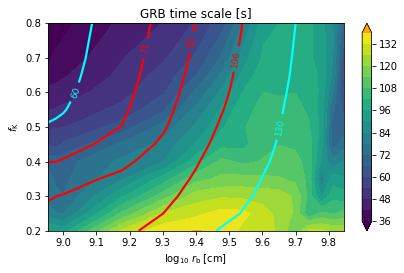

Misc_quants_ GRB_timescales_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


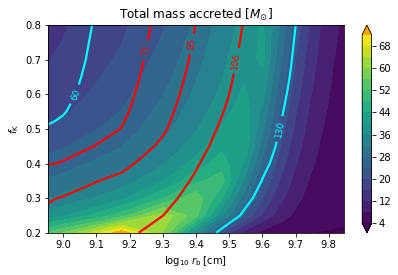

Misc_quants_ Total_mass_accreted_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


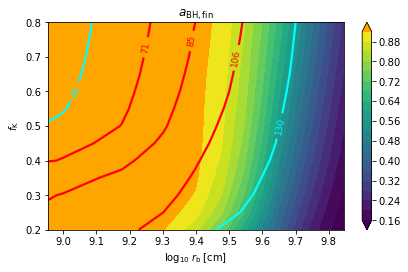

Misc_quants_ Final_BH_spin_with_p_exp_


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_over('orange')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2341491648.py:48: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb=plt.colorbar(c,extend=extend)


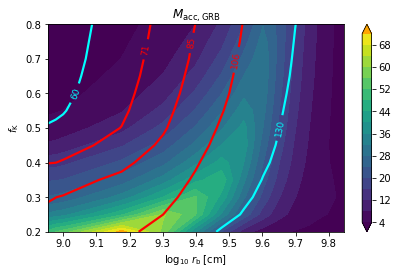

Misc_quants_ m_acc_during_GRB_with_p_exp_


In [12]:
contour_names_misc = ["GRB_timescales_with_p_exp_", "Total_mass_accreted_with_p_exp_",
                 "Final_BH_spin_with_p_exp_", "m_acc_during_GRB_with_p_exp_"]
title_names_misc = ['GRB time scale [s]',
                  'Total mass accreted [$M_{\odot}$]',
                  '$a_{\mathrm{BH,fin}}$',
                  '$M_{\mathrm{acc,GRB}}$']
save_names_misc = ['/contourplots/grb_ts/','/contourplots/m_acc/',
            '/contourplots/a_BH/', '/contourplots/m_acc_grb/']


  
with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])  
  for nt,name in enumerate(contour_names_misc):
    z_array=np.array(f[name+str(p_exp)])
    stellar_rotation_params={'p_exp':p_exp}
    final_wind_mass=np.array(f["Final_wind_mass_with_p_exp_"+str(p_exp)])
    final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
    
    contour_plots(rb_array, fk_array, z_array, final_BH_mass,title_names_misc[nt], "./" + save_names_misc[nt], model_name+'_alpha='+str(alpha)+'_p_exp_'+str(p_exp)+".pdf",linew=2.2,logscale=False,extend='both')
    
    print('Misc_quants_',name)
  

# 1D time series data

Time series data contain the time-evolution of key model quantities. If at some time the disk mass transitions below a certain threshold value, we stop evolving the system further and declare the accretion process completed. After this time instant ("t_final_arg"), the values stored in the time series arrays should be ignored. We therefore only consider data up to this time instant as shown below.

 Here, we need to choose a certain $r_b$-$f_k$ pair:

In [13]:
# pick values for r_b and f_k
rb = 1.5e9
fk = 0.3

<h4><font color = 'green'>Figure 2 of the paper</font></h4>


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/3784301066.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'mass_fallback_rates.pdf', fig=figure(100))


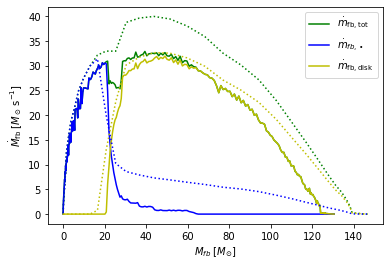

In [14]:
# Mdot_fb plots

dm_fb_BH=np.empty
dm_fb_disk=np.empty
M_fb=np.empty
time_hist=np.empty
dtime=np.empty
t_final_arg=0

filename2 = "./Renzo_models_output_files/250.25_final_prof_no_polar_funnel_blown_off.hdf5" # INSERT_YOUR_FILENAME_HERE

with h5py.File(filename, "r") as f:
  figname="|alpha="+str(alpha)+"|p_exp ="+str(p_exp)+"| j_shell= "+str(fk)+"j_kep"+r" | R_shell= "+"{:.1e}".format(rb)
  pathname="_p_exp ="+str(p_exp)+"_alpha="+str(alpha)+"_j_shell= "+str(fk)+"j_kep"+r"_R_shell= "+"{:.1e}".format(rb)
  t_final_arg=np.array(f['t_final_arg_with_'+pathname])
  M_fb=np.array(f['M_tot_fb_with_'+pathname])
  time_hist=np.array(f['time_hist_with_'+pathname])
  dtime=time_hist[1:t_final_arg]-time_hist[:t_final_arg-1]
  dtime=np.insert(dtime,0,dtime[0])
  dm_fb_BH=np.array(f['dm_fb_BH_with_'+pathname])
  dm_fb_disk=np.array(f['dm_fb_disk_with_'+pathname])

  
plt.figure(100)
plt.plot(M_fb[:t_final_arg]/Msun,(dm_fb_disk[:t_final_arg]+dm_fb_BH[:t_final_arg])/(Msun*dtime),color='g')
plt.plot(M_fb[:t_final_arg]/Msun,(dm_fb_BH[:t_final_arg])/(Msun*dtime),color='blue')
plt.plot(M_fb[:t_final_arg]/Msun,(dm_fb_disk[:t_final_arg])/(Msun*dtime),color='y')

with h5py.File(filename2, "r") as f:
  t_final_arg=np.array(f['t_final_arg_with__p_exp =4.5_alpha=0.05_j_shell= 0.3j_kep_R_shell= 1.5e+09'])
  M_fb=np.array(f['M_tot_fb_with__p_exp =4.5_alpha=0.05_j_shell= 0.3j_kep_R_shell= 1.5e+09'])
  time_hist=np.array(f['time_hist_with__p_exp =4.5_alpha=0.05_j_shell= 0.3j_kep_R_shell= 1.5e+09'])
  dtime=time_hist[1:t_final_arg]-time_hist[:t_final_arg-1]
  dtime=np.insert(dtime,0,dtime[0])
  dm_fb_BH=np.array(f['dm_fb_BH_with__p_exp =4.5_alpha=0.05_j_shell= 0.3j_kep_R_shell= 1.5e+09'])
  dm_fb_disk=np.array(f['dm_fb_disk_with__p_exp =4.5_alpha=0.05_j_shell= 0.3j_kep_R_shell= 1.5e+09'])  
  

plt.plot(M_fb[:t_final_arg]/Msun,(dm_fb_disk[:t_final_arg]+dm_fb_BH[:t_final_arg])/(Msun*dtime),color='g',ls='dotted')
plt.plot(M_fb[:t_final_arg]/Msun,(dm_fb_BH[:t_final_arg])/(Msun*dtime),color='blue',ls='dotted')
plt.plot(M_fb[:t_final_arg]/Msun,(dm_fb_disk[:t_final_arg])/(Msun*dtime),color='y',ls='dotted')  
plt.xlabel("$M_{fb}\\; [M_{\odot}]$")
plt.ylabel("$ \\dot{M}_\\mathrm{fb} \\; [M_\\odot\\,\\mathrm{s}^{-1}]$")
plt.legend(['$\\dot{m}_\\mathrm{fb,tot}$',r'$\dot{m}_{fb,\bullet}$','$\\dot{m}_\\mathrm{fb,disk}$'])
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'mass_fallback_rates.pdf', fig=figure(100))
plt.show()  
plt.close()
          

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/883881077.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'angular_momentum.pdf', fig=figure(100))


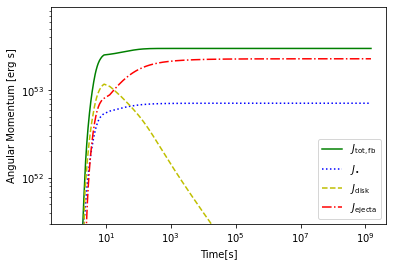

In [15]:
# J_fb plots

J_fb_total = np.empty
J_BH = np.empty
J_disk = np.empty
J_wind = np.empty
time_hist=np.empty
t_final_arg=0
with h5py.File(filename, "r") as f:
  figname="|alpha="+str(alpha)+"|p_exp ="+str(p_exp)+"| j_shell= "+str(fk)+"j_kep"+r" | R_shell= "+"{:.1e}".format(rb)
  pathname="_p_exp ="+str(p_exp)+"_alpha="+str(alpha)+"_j_shell= "+str(fk)+"j_kep"+r"_R_shell= "+"{:.1e}".format(rb)
  t_final_arg=np.array(f['t_final_arg_with_'+pathname])
  J_fb_total=np.array(f['J_fb_total_with_'+pathname])
  time_hist=np.array(f['time_hist_with_'+pathname])
  J_BH=np.array(f['J_BH_with_'+pathname])
  J_disk=np.array(f['J_disk_with_'+pathname])
  J_wind=np.array(f['J_wind_with_'+pathname])


plt.figure(100)

plt.loglog(time_hist,J_fb_total,color='g', linestyle='solid')
plt.loglog(time_hist,J_BH,color='b', linestyle=':')
plt.loglog(time_hist,J_disk,color='y', linestyle='--')
plt.loglog(time_hist,J_wind,color='r', linestyle='-.')

plt.ylim(J_fb_total[:t_final_arg].max()/100,3*(J_fb_total[:t_final_arg].max()))
plt.legend(['$J_{\mathrm{tot,fb}}$',r'$J_{\bullet}$','$J_{\mathrm{disk}}$','$J_{\mathrm{ejecta}}$'])
plt.xlabel("Time[s]")
plt.ylabel("Angular Momentum [erg s]")
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'angular_momentum.pdf', fig=figure(100))

plt.show()  
plt.close()
          

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/3045591322.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'mass_evolution.pdf', fig=figure(100))


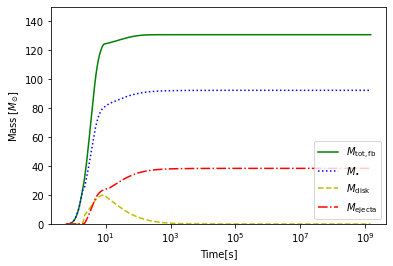

In [16]:
# M_fb plots

M_fb_total = np.empty
M_BH = np.empty
M_disk = np.empty
M_wind = np.empty
time_hist=np.empty
t_final_arg=0
with h5py.File(filename, "r") as f:
  figname="|alpha="+str(alpha)+"|p_exp ="+str(p_exp)+"| j_shell= "+str(fk)+"j_kep"+r" | R_shell= "+"{:.1e}".format(rb)
  pathname="_p_exp ="+str(p_exp)+"_alpha="+str(alpha)+"_j_shell= "+str(fk)+"j_kep"+r"_R_shell= "+"{:.1e}".format(rb)
  t_final_arg=np.array(f['t_final_arg_with_'+pathname])
  M_fb_total=np.array(f['M_tot_fb_with_'+pathname])
  time_hist=np.array(f['time_hist_with_'+pathname])
  M_BH=np.array(f['M_BH_instant_with_'+pathname])
  M_disk=np.array(f['M_disk_instant_with_'+pathname])
  M_wind=np.array(f['M_wind_instant_with_'+pathname])


plt.figure(100)

plt.semilogx(time_hist,M_fb_total/Msun,color='g', linestyle='solid')
plt.semilogx(time_hist,M_BH/Msun,color='b', linestyle=':')
plt.semilogx(time_hist,M_disk/Msun,color='y', linestyle='--')
plt.semilogx(time_hist,M_wind/Msun,color='r', linestyle='-.')

plt.ylim(0,150)
plt.legend(['$M_{\mathrm{tot,fb}}$',r'$M_{\bullet}$','$M_{\mathrm{disk}}$','$M_{\mathrm{ejecta}}$'], loc =4)
plt.xlabel("Time[s]")
plt.ylabel("Mass$\\; [M_{\odot}]$")
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'mass_evolution.pdf', fig=figure(100))

plt.show()  
plt.close()

<h4><font color = 'green'>Figure 3 of the paper</font></h4>


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/1170816736.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(M_wind/Msun,np.log10(M_dot_acc/Msun),color='k', linestyle='solid')
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/1170816736.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'mass_acrretion_rate.pdf', fig=figure(100))


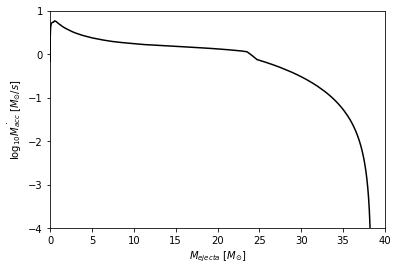

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/1170816736.py:38: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1e5)
/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/1170816736.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'alpha_frac.pdf', fig=figure(200))


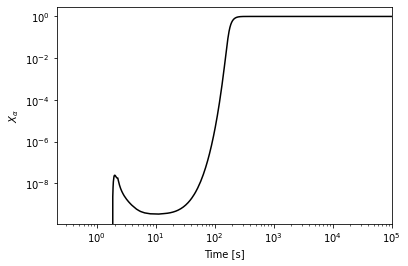

In [17]:
# Mdot_acc and X_alpha plots

M_dot_acc = np.empty
alpha_mass_frac = np.empty
M_wind = np.empty
time_hist=np.empty
t_final_arg=0
with h5py.File(filename, "r") as f:
  figname="|alpha="+str(alpha)+"|p_exp ="+str(p_exp)+"| j_shell= "+str(fk)+"j_kep"+r" | R_shell= "+"{:.1e}".format(rb)
  pathname="_p_exp ="+str(p_exp)+"_alpha="+str(alpha)+"_j_shell= "+str(fk)+"j_kep"+r"_R_shell= "+"{:.1e}".format(rb)
  t_final_arg=np.array(f['t_final_arg_with_'+pathname])
  M_dot_acc=np.array(f['M_dot_accretion_disk_with_'+pathname])
  time_hist=np.array(f['time_hist_with_'+pathname])
  alpha_mass_frac=np.array(f['alpha_mass_frac_with_'+pathname])
  M_wind=np.array(f['M_wind_instant_with_'+pathname])


plt.figure(100)

plt.plot(M_wind/Msun,np.log10(M_dot_acc/Msun),color='k', linestyle='solid')

plt.ylim(-4,1)
plt.xlim(0,40)
plt.xlabel("$M_{ejecta} \ [M_{\odot}]$")
plt.ylabel("$\log_{10} \dot{M_{acc}}\\; [M_{\odot}/s]$")
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'mass_acrretion_rate.pdf', fig=figure(100))

plt.show()  
plt.close()


plt.figure(200)

plt.loglog(time_hist,alpha_mass_frac,color='k', linestyle='solid')

plt.xlim(0,1e5)
plt.xlabel("Time [s]")
plt.ylabel("$X_{\\alpha}$")
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'alpha_frac.pdf', fig=figure(200))

plt.show()  
plt.close()

<h4><font color = 'green'>Figures 10, 11 and 12 of the paper</font></h4>


/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2636677823.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'strain_time_series.pdf', fig=figure(100))


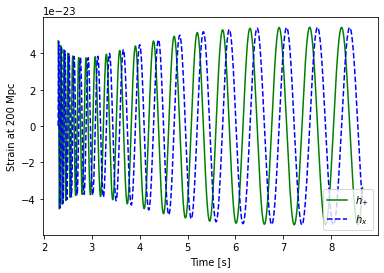

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2636677823.py:50: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'strain_frequency_space.pdf', fig=figure(200))


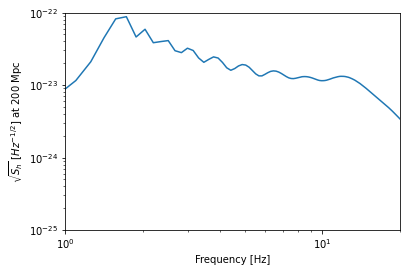

/var/folders/w4/pj146kkd3y163mqz07_30j340000gn/T/ipykernel_1382/2636677823.py:64: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fig" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('./1D_time_series_figs/'+ 'GW_frequency_evol.pdf', fig=figure(300))


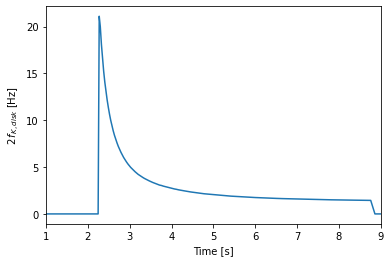

In [18]:
time_hist = np.empty
Omega_disk = np.empty
dt_lin = np.empty
root_S_h=np.empty
hplus_GW_signal=np.empty
hcross_GW_signal=np.empty
dt_lin = np.empty
t_final_arg=0
r_in_Mpc = 200
instability_existence = np.empty
with h5py.File(filename, "r") as f:
  figname="|alpha="+str(alpha)+"|p_exp ="+str(p_exp)+"| j_shell= "+str(fk)+"j_kep"+r" | R_shell= "+"{:.1e}".format(rb)
  pathname="_p_exp ="+str(p_exp)+"_alpha="+str(alpha)+"_j_shell= "+str(fk)+"j_kep"+r"_R_shell= "+"{:.1e}".format(rb)
  t_final_arg=np.array(f['t_final_arg_with_'+pathname])
  Omega_disk=np.array(f['Omega_disk_with_'+pathname])
  hplus_GW_signal=np.array(f['hplus_GW_signal_with_'+pathname])
  hcross_GW_signal = np.array(f['hcross_GW_signal_with_' + pathname])
  root_S_h=np.array(f['root_S_h_with_'+pathname])
  df=np.array(f['df_with_'+pathname])
  dt_lin=np.array(f['dt_lin_with_'+pathname])
  instability_existence = np.array(f['instability_existence_with_'+pathname])
  time_hist = np.array(f["time_hist_with_"+pathname])


plt.figure(100)

plt.plot(dt_lin,hplus_GW_signal,color='g', linestyle='solid')
plt.plot(dt_lin,hcross_GW_signal,color='b', linestyle='dashed')

plt.xlabel("Time [s]")
plt.ylabel("Strain at 200 Mpc")
plt.legend(["$h_{+}$","$h_{x}$"], loc =4)
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'strain_time_series.pdf', fig=figure(100))
plt.show()  
plt.close()


plt.figure(200)

plt.loglog(df, root_S_h)

plt.ylim(1e-25,1e-22)
plt.xlim(1,2e1)
plt.xlabel("Frequency [Hz]")
plt.ylabel(r'$\sqrt{S_h}$ $[Hz^{-1/2}]$ at '+str(r_in_Mpc)+' Mpc')
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'strain_frequency_space.pdf', fig=figure(200))
plt.show()  
plt.close()


plt.figure(300)

plt.plot(time_hist, instability_existence*Omega_disk/np.pi)

plt.xlim(1,9)
plt.ylabel("$2\,f_{K,disk}$ [Hz]")
plt.xlabel('Time [s]')
if not os.path.exists("./1D_time_series_figs/"):
    os.makedirs("./1D_time_series_figs/")
plt.savefig('./1D_time_series_figs/'+ 'GW_frequency_evol.pdf', fig=figure(300))
plt.show()  
plt.close()

# Generating data tables

In [19]:
def bilinear_interp(rb_array,fk_array,interp_x,interp_y,z_array):
	x1_pos=np.where(rb_array<interp_x)[0][-1]
	x2_pos=np.where(rb_array>interp_x)[0][0]
	y1_pos=np.where(fk_array<interp_y)[0][-1]
	y2_pos=np.where(fk_array>interp_y)[0][0]

	x2=rb_array[x2_pos]
	x1=rb_array[x1_pos]
	y2=fk_array[y2_pos]
	y1=fk_array[y1_pos]

	denom_interp=1/((x2-x1)*(y2-y1))

	f11=z_array[y1_pos,x1_pos]
	f12=z_array[y2_pos,x1_pos]
	f21=z_array[y1_pos,x2_pos]
	f22=z_array[y2_pos,x2_pos]

	return multiply(denom_interp,np.array([x2-interp_x, interp_x-x1])@np.array([[f11,f12],[f21,f22]])@transpose(np.array([y2-interp_y,interp_y-y1])))


In [20]:
from scipy import interpolate
with h5py.File(filename, "r") as f:
  rb_array=np.array(f["R_shell_array"])
  fk_array=np.array(f["surf_array"])
  p_exp=4.5
  alpha=0.05
  BH_contour=[106,85,71]
  contour_names_frac=["LRP_mass_with_p_exp_","RP_mass_with_p_exp_","Ni_mass_with_p_exp_","He_mass_with_p_exp_","Lanthanide_mass_with_p_exp_"]
  stellar_rotation_params={'p_exp':p_exp}
  final_wind_mass=np.array(f["Final_wind_mass_with_p_exp_"+str(p_exp)])
  final_BH_mass=np.array(f["Final_BH_mass_with_p_exp_"+str(p_exp)])
  for specific_bh in BH_contour:
    #Working along one of the three contours in the selected file/model
    cs = plt.contour(rb_array,fk_array,final_BH_mass, [specific_bh])
    p = cs.collections[0].get_paths()[0]
    plt.close()
    v = p.vertices
    y1 = np.array(v[:,0])
    x1 = np.array(v[:,1])
    contour_line=interpolate.interp1d(x1, y1, kind='cubic')
    sample_list=[]
    if specific_bh==106:
      possible_fk=np.array([ 0.25,0.35,0.45, 0.6])
    elif specific_bh==85:
      possible_fk=np.array([ 0.35,0.45,0.55, 0.6])
    else:
      possible_fk=np.array([0.5, 0.55, 0.6,0.65])

    possible_rb=contour_line(possible_fk)
    for nr,rb in enumerate(possible_rb):
      sample_list.append([rb,possible_fk[nr]])

    k_count=int(size(sample_list)/2)
    
    interpolated_values=np.zeros(k_count)
    ejecta_value=np.zeros(k_count)
    X_La=np.zeros(k_count)
    X_lrp=np.zeros(k_count)
    X_Ni=np.zeros(k_count)
    X_total_rp=np.zeros(k_count)
        
    for nt,item in enumerate(sample_list):
      total_mass_fraction=0
      #Traversing through the selected values on the contour and finding desired values
      for ct,name in enumerate(contour_names_frac):
        z_array=np.array(f[name+str(p_exp)])
        interpolated_values[nt]=bilinear_interp(rb_array,fk_array,item[0],item[1],z_array)/bilinear_interp(rb_array,fk_array,item[0],item[1],final_wind_mass)
        total_mass_fraction=total_mass_fraction+interpolated_values[nt]
        ejecta_value[nt]=bilinear_interp(rb_array,fk_array,item[0],item[1],final_wind_mass)
        if name=="Ni_mass_with_p_exp_":
          X_Ni[nt]=interpolated_values[nt]
        elif name=="LRP_mass_with_p_exp_":
          X_lrp[nt]=interpolated_values[nt]
          X_total_rp[nt]=X_total_rp[nt]+interpolated_values[nt]
        elif name== "RP_mass_with_p_exp_":
          X_total_rp[nt]=X_total_rp[nt]+interpolated_values[nt] 
        elif name=="Lanthanide_mass_with_p_exp_":
          X_La[nt]=interpolated_values[nt]
        else:
          continue
          
    for nt,item in enumerate(sample_list): # Traversing through the selected values on the contour and printing desired values
        if (X_La[nt]+X_lrp[nt]-X_total_rp[nt]>1e-7):
          print('Error-----------------------------------------------------------!!!')
          print(X_total_rp[nt]-(X_La[nt]+X_lrp[nt]))
          continue
        print(" & "+"{0:.0f}".format(specific_bh)+" & "+" "+"{0:.2f}".format(ejecta_value[nt])+" & "+"{0:.2f}".format(item[0]/1e9)," & "+"{0:.2f}".format(item[1])+" & "+"{0:.3f}".format(X_La[nt])+" & "+"{0:.2f}".format(X_lrp[nt])+" & "+"{0:.4f}".format(X_Ni[nt])+" & "+"{0:.4f}".format(X_Ni[nt]/X_total_rp[nt])+"\\")          
            
                  

 & 106 &  26.46 & 2.00  & 0.25 & 0.020 & 0.58 & 0.0011 & 0.0018\
 & 106 &  28.87 & 2.41  & 0.35 & 0.013 & 0.46 & 0.0020 & 0.0041\
 & 106 &  30.01 & 2.76  & 0.45 & 0.007 & 0.33 & 0.0032 & 0.0092\
 & 106 &  30.70 & 3.17  & 0.60 & 0.003 & 0.18 & 0.0041 & 0.0215\
 & 85 &  46.02 & 1.31  & 0.35 & 0.010 & 0.44 & 0.0048 & 0.0103\
 & 85 &  45.94 & 1.89  & 0.45 & 0.005 & 0.26 & 0.0067 & 0.0242\
 & 85 &  47.30 & 2.17  & 0.55 & 0.003 & 0.16 & 0.0078 & 0.0463\
 & 85 &  47.51 & 2.26  & 0.60 & 0.003 & 0.13 & 0.0079 & 0.0558\
 & 71 &  57.93 & 1.49  & 0.50 & 0.003 & 0.15 & 0.0115 & 0.0741\
 & 71 &  58.75 & 1.59  & 0.55 & 0.002 & 0.11 & 0.0127 & 0.1101\
 & 71 &  59.14 & 1.66  & 0.60 & 0.002 & 0.09 & 0.0124 & 0.1282\
 & 71 &  59.25 & 1.72  & 0.65 & 0.002 & 0.08 & 0.0108 & 0.1259\
